In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dades de les enquestes i dades generals dels treballadors
employee_data = pd.read_csv("./dataset/employee_survey_data.csv")
manager_data = pd.read_csv("./dataset/manager_survey_data.csv")
general_data = pd.read_csv("./dataset/general_data.csv")

# Temps d'entrada i sortida del treball de tot l'any de cada treballador
in_time = pd.read_csv("./dataset/in_time.csv")
out_time = pd.read_csv("./dataset/out_time.csv")

# 1. Preprocessat

In [2]:
# Calcular hora d'entrada i sortida mitjans per cada treballador
in_time = in_time.drop(in_time.columns[0], axis=1)
in_time = in_time.astype("datetime64[ns]")
in_time = in_time.applymap(lambda x: x.hour + x.minute/60 if not pd.isna(x.hour) else np.nan)

out_time = out_time.drop(out_time.columns[0], axis=1)
out_time = out_time.astype("datetime64[ns]")
out_time = out_time.applymap(lambda x: float(f"{x.hour}.{x.minute}") if not pd.isna(x.hour) else np.nan)

general_data["MeanInTime"] = in_time.mean(axis=1)
general_data["MeanOutTime"] = out_time.mean(axis=1)

In [3]:
# Agrupar dades
employee_data = employee_data.drop("EmployeeID", axis=1)
manager_data = manager_data.drop("EmployeeID", axis=1)
general_data = general_data.drop("EmployeeID", axis=1)
data = pd.concat([general_data, employee_data, manager_data], axis=1)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MeanInTime,MeanOutTime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1,0,0,9.993032,17.258621,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,5,1,4,9.980720,17.601229,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5,0,3,10.016598,16.895289,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,8,7,5,9.973830,17.046383,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,6,0,4,9.990068,17.881796,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,...,3,0,2,10.011317,18.396955,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,...,3,0,2,9.996196,15.975436,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,...,4,1,2,9.971501,17.548528,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,1,...,9,7,8,10.010650,19.355021,4.0,1.0,3.0,2,3


In [4]:
# Informació dels tipus de columnes i quantitat de files no-nules per cadascuna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [32]:
from sklearn.preprocessing import LabelEncoder

# Codificar dades categoriques (ignorarem els valors nuls al ser pocs)
labeled_cols = data.columns[data.dtypes == "object"]
col_encoders = {col: LabelEncoder() for col in labeled_cols}

data_encoded = data.copy()

for col, le in col_encoders.items():
    data_encoded[col] = le.fit_transform(data[col])

data_encoded.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MeanInTime,MeanOutTime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,1.0,0.600000,2.063946,...,7.008163,2.187755,4.123129,9.991773,17.563634,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,0.367780,0.665304,0.527673,8.105026,1.023933,1.331067,0.0,0.489954,1.106689,...,6.125135,3.221699,3.567327,0.018147,1.339622,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,9.929079,15.761404,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,1.000000,...,3.000000,0.000000,2.000000,9.979616,16.515815,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.0,1.000000,2.000000,...,5.000000,1.000000,3.000000,9.991957,17.278963,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.0,1.000000,3.000000,...,9.000000,3.000000,7.000000,10.003581,18.210203,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.0,1.000000,5.000000,...,40.000000,15.000000,17.000000,10.069684,20.958826,4.000000,4.000000,4.000000,4.000000,4.000000


In [41]:
# Borrem columnes sense variabilitat (std=0) que no ens interesen
not_interesting = data.columns[data_encoded.std() == 0]
data_encoded.drop(not_interesting, inplace=True, axis=1)
data.drop(not_interesting, inplace=True, axis=1)
not_interesting

Index([], dtype='object')

# 2. EDA

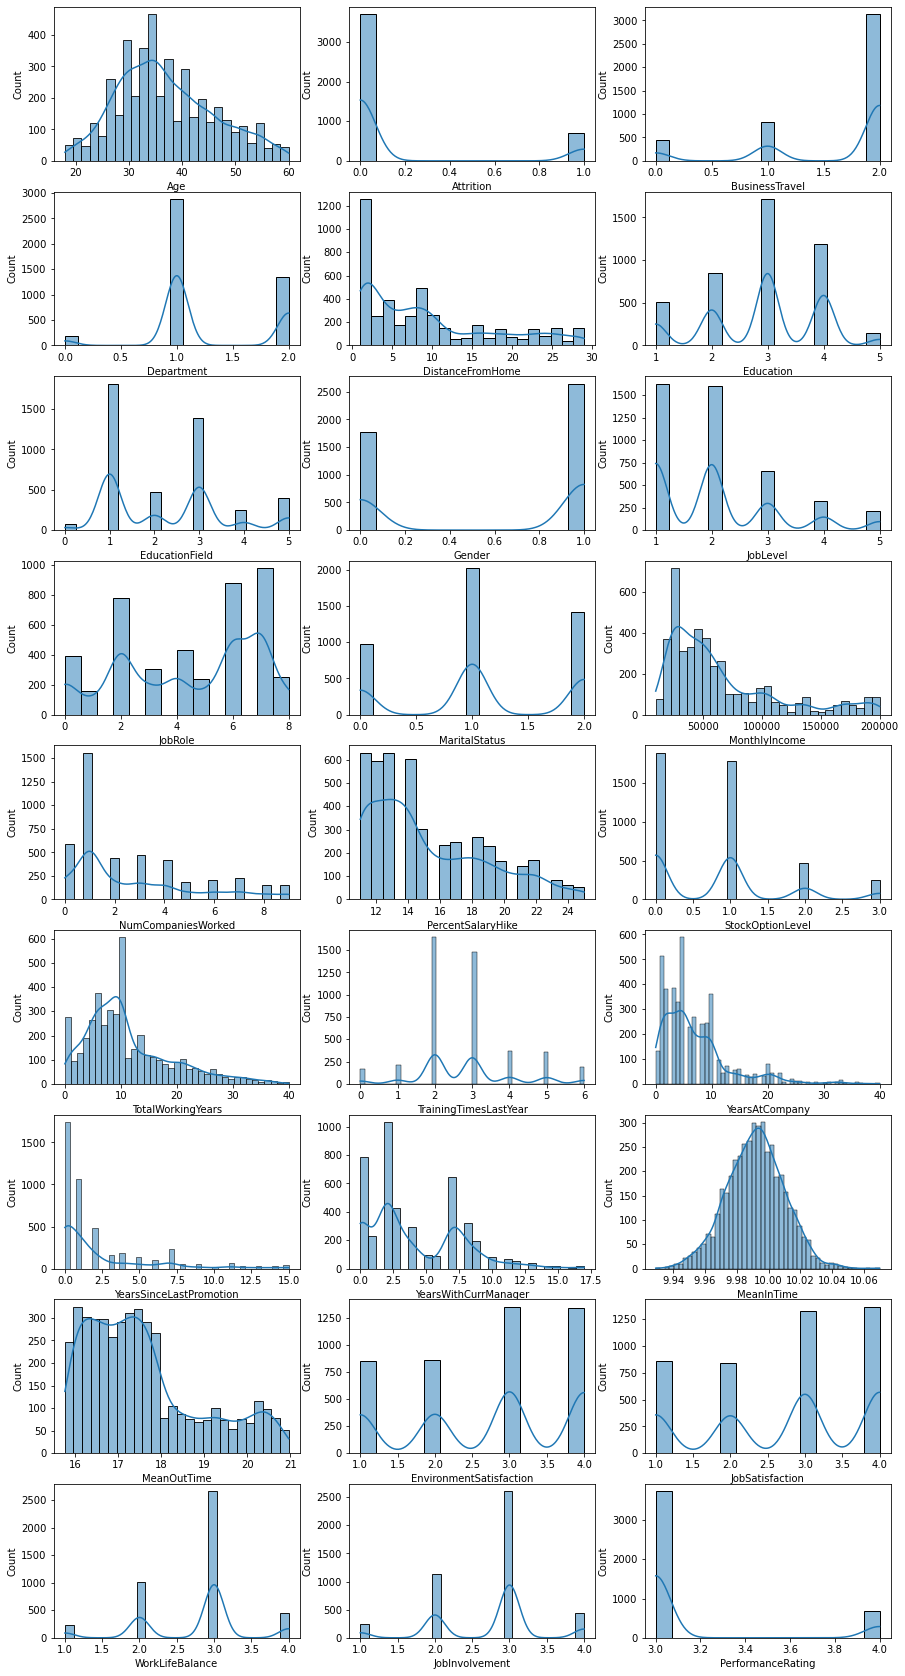

In [167]:
# Histogrames de les caracteristiques
def plot_hists(df, cols=None, hue=None, size=(15, 30), colwidth=3):
    fig, axs = plt.subplots(int(np.ceil(len(cols)/colwidth)), colwidth, figsize=size)
    for i, c in enumerate(cols):
        plt.subplot(int(np.ceil(len(cols)/colwidth)), colwidth, i+1)
        sns.histplot(df, x=c, kde=True, hue=hue, multiple="stack")

plot_hists(data_encoded, cols=data_encoded.columns)
plt.show()

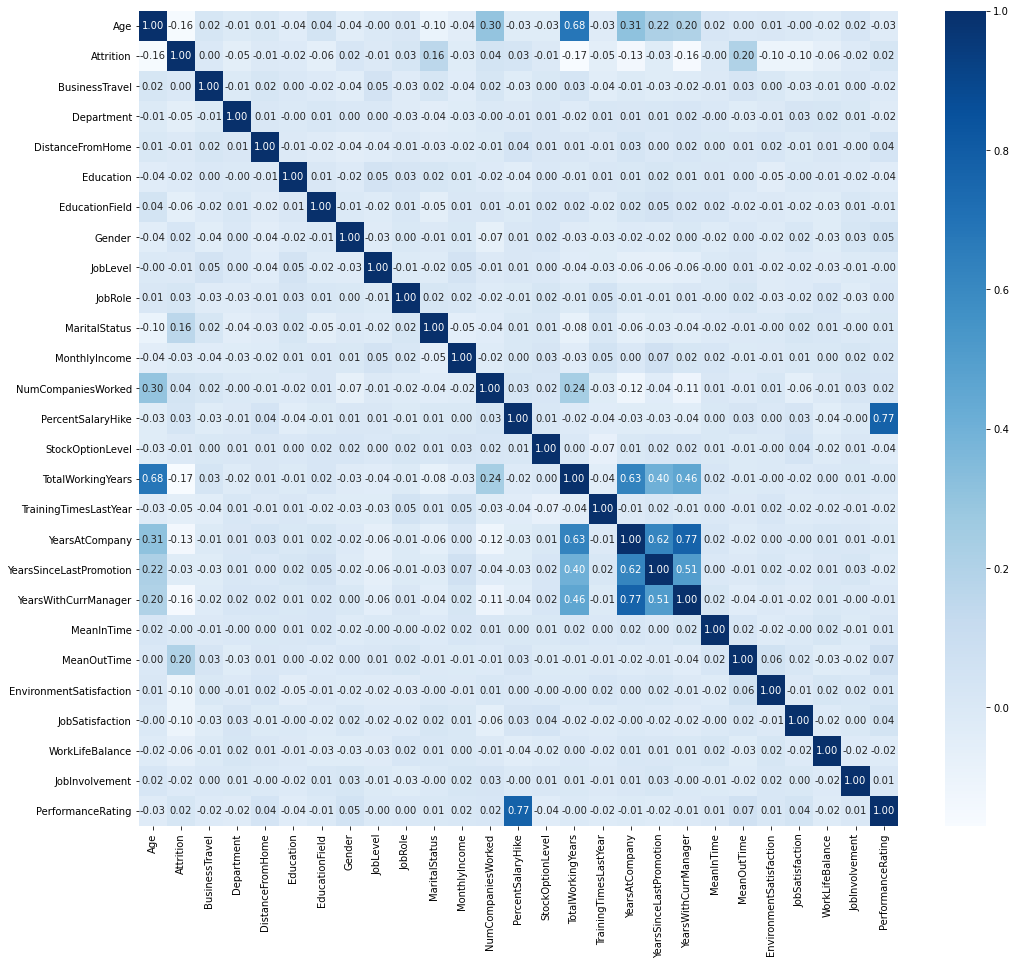

In [55]:
# Heatmap de correlació
plt.figure(figsize=(17,15))
corr = data_encoded.corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.show()

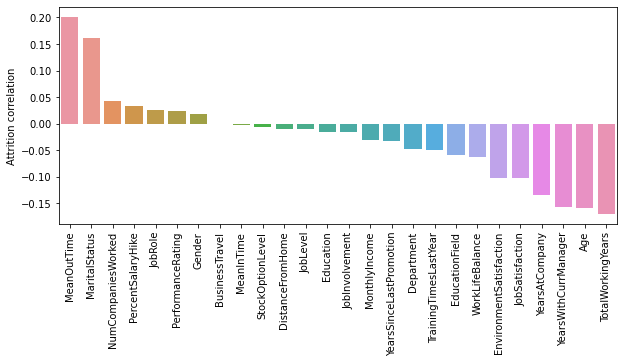

In [66]:
# Barplot de correlació de l'Attrition amb la resta
plt.figure(figsize=(10,4))
top_corr = corr["Attrition"].drop("Attrition").sort_values(ascending=False)
sns.barplot(x=top_corr.index, y=top_corr)
plt.ylabel("Attrition correlation")
plt.xticks(rotation=90)
plt.show()

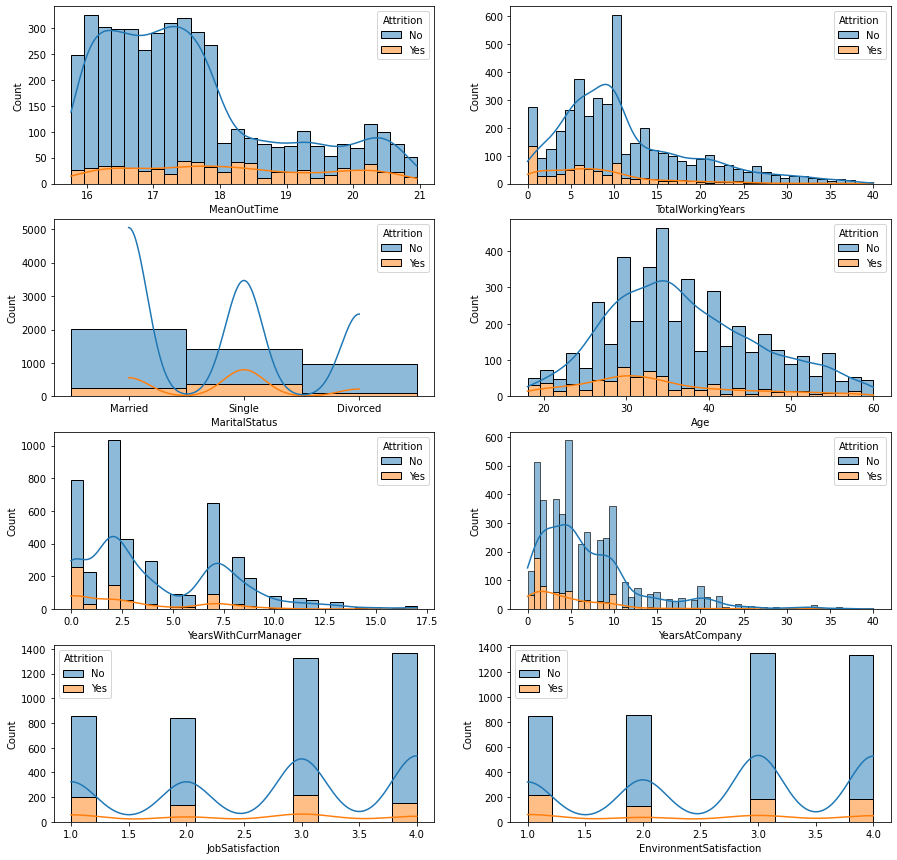

In [170]:
top8_abs_corr_cols = np.abs(top_corr).sort_values(ascending=False)[:8].index
plot_hists(data, cols=top8_abs_corr_cols, hue="Attrition", size=(15,15), colwidth=2)
plt.show()

Per les dades veiem que el perfil tendent (encara que de forma lleu) a anar-se'n de l'empresa és gent que surt tard del treball, està soltera, és jove (<40 anys), no té un manager estable, i no té molta experiència acumulada ni en la seva vida laboral ni en l'empresa. Addicionalment, aquestes persones també notifiquen dades més negatives quant a la satisfacció del treball i de l'entorn.
